In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (100, 2)
dimensions de y: (100, 1)


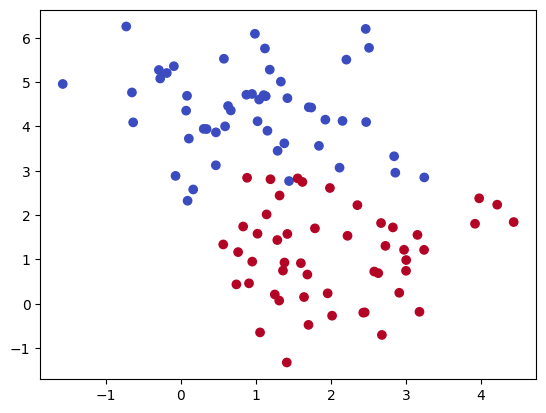

In [96]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

In [97]:
def initialisation(X):
    """Initialisation des paramètres W et b de la régression logistique"""
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [98]:
def model(X, W, b):
    """Retourne la fonction d'activation de la couche de sortie"""
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [99]:
def log_loss(A,y):
    """Retourne la log loss"""
    return -np.mean(y*np.log(A) + (1-y)*np.log(1-A))

In [100]:
def gradients(A, X, y):
    """Retourne les gradients de la log loss par rapport à W et b"""
    dW = 1 / len(y) * np.dot(X.T, A - y)  # dérivée de la log loss par rapport à W, voir formulaire pdf
    db = np.mean(A - y) # dérivée de la log loss par rapport à b, voir formulaire pdf
    return (dW, db)

    

In [101]:
def update(dW, db, W, b, alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return (W, b)

In [111]:
def predict(X, W, b):
    A = model(X, W, b) # activation (sorties du réseau de neurones)
    print(A)
    return A>=0.5

In [103]:
def artificial_neural_network(X, y, learning_rate=0.1, n_iter=1000):
    # Initialisation des paramètres
    W, b = initialisation(X)

    Loss = []

    # Boucle d'apprentissage
    for i in range(n_iter):
        # Forward
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        # Backward
        dW, db = gradients(A, X, y)
        # Mise à jour des paramètres
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    print("Accuracy:" , accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b) # retourne les paramètres appris

Accuracy: 0.92


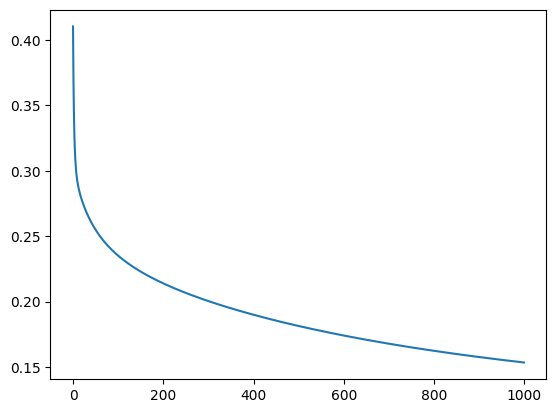

In [105]:
# courbe d'apprentissage
W,b = artificial_neural_network(X, y)


Les erreurs décroissent, l'apprentissage fonctionne. La fonction de coût converge.

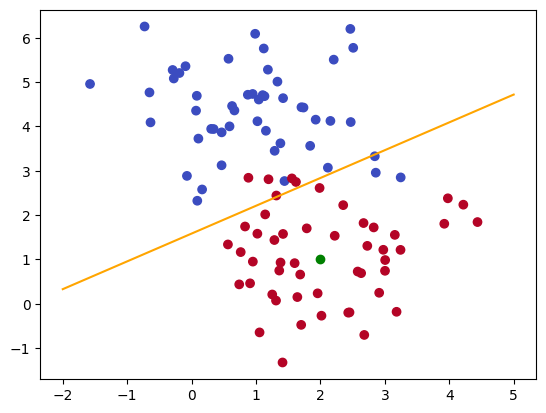

In [115]:
# frontière de décision est le point où la probabilité de la fonction d'activation est de 0.5
# donc on cherche le point où W1*x1 + W2*x2 + b = 0

x1 = np.linspace(-2, 5, 100)
x2 = -(W[0]*x1 + b) / W[1]
plt.plot(x1, x2, c='orange')


new_plant = np.array([2,1]) # nouvelle plante à prédire
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.scatter(new_plant[0], new_plant[1], c='green')
plt.show()


In [112]:
predict(new_plant, W, b)


[0.96566538]


array([ True])